                            OLS Regression Results                            
Dep. Variable:                    EPC   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     51.22
Date:                Fri, 07 Jul 2023   Prob (F-statistic):           3.15e-73
Time:                        12:22:14   Log-Likelihood:                -75698.
No. Observations:               57196   AIC:                         1.514e+05
Df Residuals:                   57188   BIC:                         1.515e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

/Users/josemonagas/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


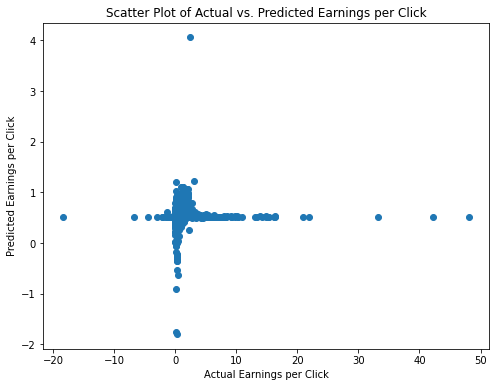

In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Prepare your dataset
data = pd.read_excel("dataset.xlsx")  

# Step 2: Load and preprocess the data (if needed)
# ...

# Step 3: Split the data into training and testing sets
y = data["EPC"]
X = data[["Search_Clicks", "Direct_Clicks", "NYT_Homepage_Clicks", "NYT_Referral_Clicks", "External_Referral_Clicks", "WC_Email_Clicks", "WC_Social_Clicks"]]
# Split the data into training and testing sets (80% training, 20% testing)
train_size = int(0.8 * len(data))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Step 4: Fit the multiple linear regression model
X_train = sm.add_constant(X_train)  # Add a constant term for the intercept
model = sm.OLS(y_train, X_train)
results = model.fit()

# Step 5: Evaluate the model
print(results.summary())  # Print the summary of the regression results

# Step 6: Calculate p-values
p_values = results.pvalues[1:]  # Exclude the constant term
significant_features = p_values[p_values < 0.05]  # Select features with p-values < 0.05

# Step 7: Interpret the results
print("Significant Features:")
print(significant_features)

# Step 8: Visualize the results
# Create a scatter plot of predicted values vs. actual values
X_test = sm.add_constant(X_test)  # Add a constant term for the intercept in the test set
y_pred = results.predict(X_test)
plt.figure(figsize=(8, 6))  # Adjust the dimensions as needed

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Earnings per Click")
plt.ylabel("Predicted Earnings per Click")
plt.title("Scatter Plot of Actual vs. Predicted Earnings per Click")

# Save the chart
plt.savefig("scatter_plot.png", dpi=300)  # Specify the file name and dpi (dots per inch)

plt.show()
